<a href="https://colab.research.google.com/github/Satish055/Machine_Learning_D/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Objective of your problem: Regression, classification, clustering or Time Series
EDA - you get to know about the data - hint on which model within the algorithm
There is no certain way to know - thats where you have:
    1. Choose all the possible model - you need to run them
    2. Make sure you select right parameters for each

'''
# Time Series Analysis
'''
Similar to Regression but the dataset will have a time component
which makes us to look at other parameters and not just the value you have.


'''

'\nSimilar to Regression but the dataset will have a time component\nwhich makes us to look at other parameters and not just the value you have.\n\n\n'

In [2]:
link='/content/AirPassengers.csv'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plot_tsa(df,x,y,title="",xlabel="", ylabel=""):
    plt.figure(figsize=(16,5))
    plt.plot(x,y,color="blue")
    plt.show()

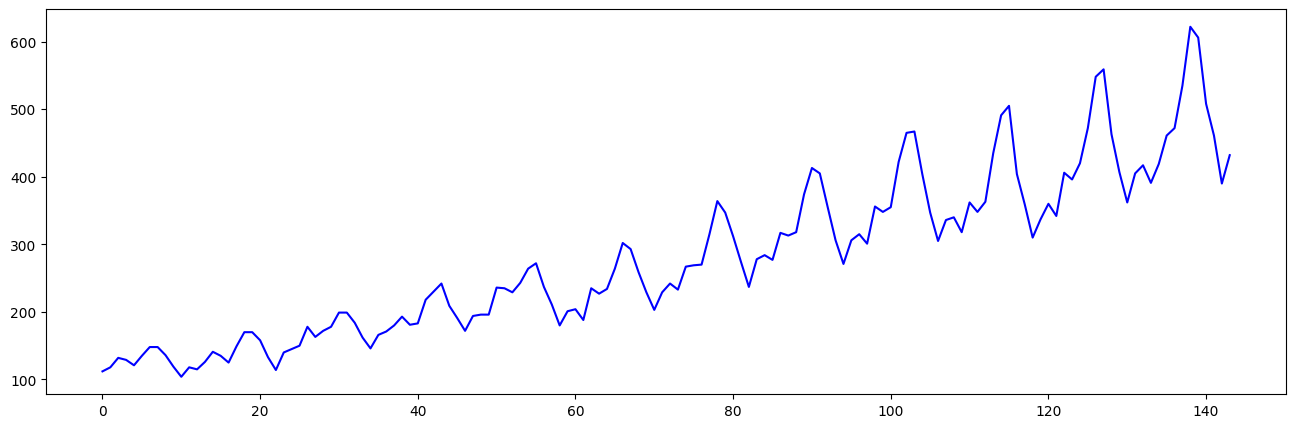

In [12]:
if __name__=="__main__":
    df = pd.read_csv(link)

    plot_tsa(df, x=df.index, y=df['#Passengers'],
             title="Air Passengers Travel", xlabel="Months",
             ylabel="Passengers")

In [15]:
# Getting the time stamp
df['Month'] = pd.to_datetime(df['Month'])
df['Year'] = [dt.year for dt in df.Month]
# set month as index for thi dataset
data_df = df.set_index('Month', inplace=False)
ts = data_df['#Passengers']
ma = ts.rolling(12).mean()

         Month  #Passengers  Year
0   1949-01-01          112  1949
1   1949-02-01          118  1949
2   1949-03-01          132  1949
3   1949-04-01          129  1949
4   1949-05-01          121  1949
..         ...          ...   ...
139 1960-08-01          606  1960
140 1960-09-01          508  1960
141 1960-10-01          461  1960
142 1960-11-01          390  1960
143 1960-12-01          432  1960

[144 rows x 3 columns]


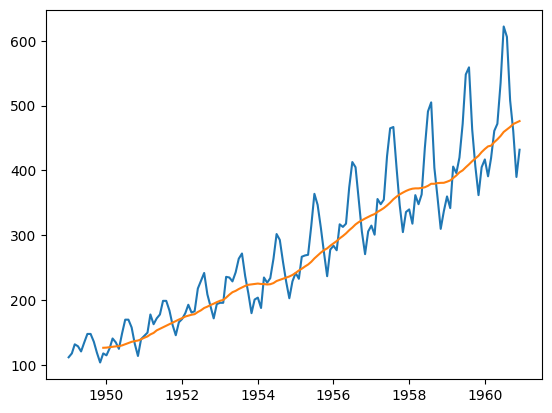

In [17]:
print(df)
plt.plot(ts)
plt.plot(ma)
plt.show()

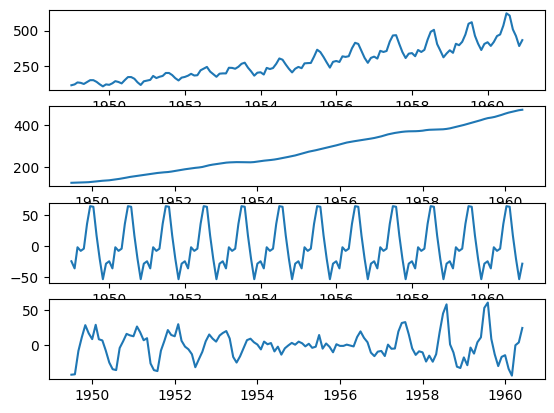

In [20]:
# decompose the data into Trend, Seasonality and Error
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(ts)
trend = decom.trend
seasonal = decom.seasonal
error = decom.resid
plt.subplot(411)
plt.plot(ts, label="Original")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.subplot(414)
plt.plot(error, label="Error")
plt.tight_layout
plt.show()

In [21]:
'''
    Check for Stationary in Time Series:
    Checking is critical for:
    1. Model assumption: when we use specific model to make predictions,
    the assumptions can go wrong if the data is not stationary
    2. Stationary data has constant mean and variance over time hence
    model building and prediction becomes easy.
    3. Prediction becomes easier for stationary as their statistical
    properties doesnt change over time
'''

'\n    Check for Stationary in Time Series:\n    Checking is critical for:\n    1. Model assumption: when we use specific model to make predictions,\n    the assumptions can go wrong if the data is not stationary\n    2. Stationary data has constant mean and variance over time hence\n    model building and prediction becomes easy.\n    3. Prediction becomes easier for stationary as their statistical\n    properties doesnt change over time\n'

In [22]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(ts)
stat_val = adf_test[0]
p_val = adf_test[1]
if p_val >0.05:
        print("Time series is stationary and proceed with prediction")
else:
        print("Time series is not stationary. First make it stationary before prediction")

Time series is stationary and proceed with prediction


In [23]:
'''
    Prediction: ARIMA
    AR - Auto Regressive - p
    p = specifies number of lagged observation

    I - Integrated
    d - number of times to differentiate to make the data stationary

    MA - Moving Average
    q = number of periods for calculating moving average
'''

'\n    Prediction: ARIMA\n    AR - Auto Regressive - p\n    p = specifies number of lagged observation\n    \n    I - Integrated\n    d - number of times to differentiate to make the data stationary\n    \n    MA - Moving Average\n    q = number of periods for calculating moving average\n'

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


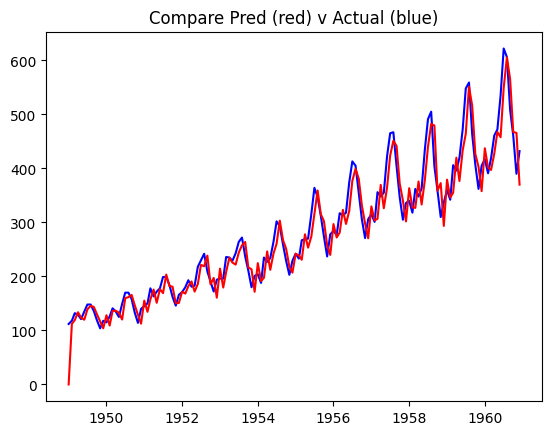

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(ts,order=(2,1,3))
output = model1.fit()  # training
#plot original data with the predicted
plt.plot(ts,color="blue") #original data
plt.plot(output.fittedvalues, color="red")
plt.title("Compare Pred (red) v Actual (blue)")
plt.show()

In [25]:
# calculate RMSE for the above prediction
pred= output.fittedvalues
mse = sum((pred-ts)**2)/len(ts)
rmse = mse **0.5
print("RMSE for Model 1 = ",rmse)

RMSE for Model 1 =  30.742825364606393


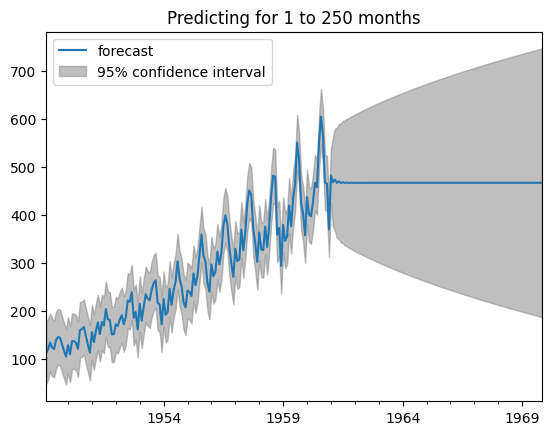

In [26]:
#plot the predicted values
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(start=1,end=250,result=output)
plt.title("Predicting for 1 to 250 months")
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


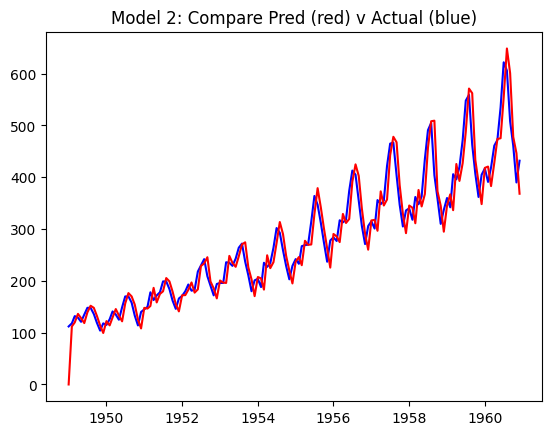

In [27]:
# Model 2
model1 = ARIMA(ts, order=(1, 1, 0))
output = model1.fit()  # training
# plot original data with the predicted
plt.plot(ts, color="blue")  # original data
plt.plot(output.fittedvalues, color="red")
plt.title("Model 2: Compare Pred (red) v Actual (blue)")
plt.show()

In [28]:
# calculate RMSE for the above prediction
pred = output.fittedvalues
mse = sum((pred - ts) ** 2) / len(ts)
rmse = mse ** 0.5
print("RMSE for Model 2 = ", rmse)

RMSE for Model 2 =  33.3057824505887


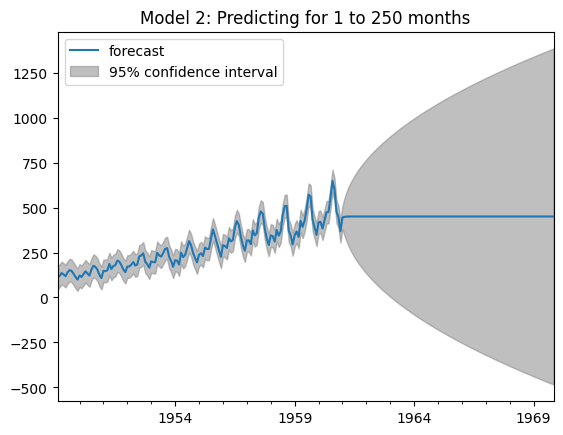

In [29]:
# plot the predicted values
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(start=1, end=250, result=output)
plt.title("Model 2: Predicting for 1 to 250 months")
plt.show()